In [258]:
from sklearn.feature_selection import SelectPercentile
import pandas as pd
from sklearn.feature_selection import f_regression
import numpy as np
import pandas as pd
from sklearn import linear_model as lm
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
import scipy.stats as stat
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [238]:
X_train = pd.read_csv('Pr_train_20.csv',parse_dates=['PERIOD (FORMATTED)'],
                 infer_datetime_format=True, encoding='utf-8')

In [11]:
y_train=X_train['Excess']
X_train.drop(['Excess', 'ACCX','CASH_P.1','IDENTIFIER','PERIOD (FORMATTED)','FUTURE 24 WEEK RETURNS','RANK','RVM_CFO_AST.1','TECHNICAL1.1'], axis=1,inplace =True)

In [10]:
X_train.columns

Index(['1M_RET', 'MCAP', '1SS_ERNQLT', 'IST_SURPY1', 'ARM_PFD_COMP',
       'RET24M_L1M', 'RSI_12M.1', 'MIN12M.1', 'EV.1', 'VALUE_COM.1',
       'QUALITY.1', 'RISK', 'PP_RANK'],
      dtype='object')

In [12]:
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X_train,y_train)

SelectPercentile(percentile=25,
         score_func=<function f_regression at 0x1088c4268>)

In [14]:
d={}
for n,s in zip(X_train.columns,Selector_f.scores_):
    d[s]=n
    print ("F-score: %3.2ft for feature %s " % (s,n))

F-score: 584.78t for feature 1M_RET 
F-score: 98.10t for feature MCAP 
F-score: 3070.21t for feature 1SS_ERNQLT 
F-score: 422.15t for feature IST_SURPY1 
F-score: 4307.78t for feature ARM_PFD_COMP 
F-score: 4753.28t for feature RET24M_L1M 
F-score: 1893.97t for feature RSI_12M.1 
F-score: 1765.77t for feature MIN12M.1 
F-score: 249.88t for feature EV.1 
F-score: 1039.91t for feature VALUE_COM.1 
F-score: 1455.59t for feature QUALITY.1 
F-score: 2543.64t for feature RISK 
F-score: 2317.29t for feature PP_RANK 


In [15]:
sorted(d.items())

[(98.095433847459248, 'MCAP'),
 (249.88039988187461, 'EV.1'),
 (422.1454977420193, 'IST_SURPY1'),
 (584.77949401335741, '1M_RET'),
 (1039.9131637438966, 'VALUE_COM.1'),
 (1455.5941331949757, 'QUALITY.1'),
 (1765.7711790720737, 'MIN12M.1'),
 (1893.9650441576468, 'RSI_12M.1'),
 (2317.2895598220557, 'PP_RANK'),
 (2543.6443596401386, 'RISK'),
 (3070.2111091678471, '1SS_ERNQLT'),
 (4307.7833306192233, 'ARM_PFD_COMP'),
 (4753.2770666422939, 'RET24M_L1M')]

In [16]:
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

ValueError: Unknown label type: 'continuous'

In [ ]:
'RISK''1SS_ERNQLT' 'ARM_PFD_COMP''RET24M_L1M'
'QUALITY.1' 'MIN12M.1' 'RSI_12M.1' 'PP_RANK'

In [24]:
 P_train = X_train[['RISK','1SS_ERNQLT','ARM_PFD_COMP','RET24M_L1M','QUALITY.1', 'MIN12M.1', 'RSI_12M.1', 'PP_RANK']]

In [25]:
P_train.head()

,RISK,1SS_ERNQLT,ARM_PFD_COMP,RET24M_L1M,QUALITY.1,MIN12M.1,RSI_12M.1,PP_RANK
0,0.014736,0.001082,-0.288839,-0.002757,-0.019840,-0.004266,-0.115162,-0.244777
1,0.005954,0.018936,-0.036314,0.000010,-0.001720,0.000592,0.031485,0.068354
2,0.059482,0.130047,0.236413,0.004571,0.001062,0.010132,0.058348,-0.436697
3,0.011318,-0.354802,0.256615,-0.000507,-0.004681,0.005278,-0.014272,-0.315484
4,0.020004,0.018936,0.377827,-0.000229,-0.002440,0.011014,0.030606,-0.396293


In [35]:
X_train= pd.DataFrame(X_train['Excess'])

In [36]:
X_train.head()

,Excess
PERIOD (FORMATTED),
2015-08-07,-25.108537
2015-08-14,-14.344045
2015-08-14,-16.692228
2015-08-14,-13.234320
2015-08-14,-5.039901


In [37]:
pv = pd.pivot_table(X_train, index=X_train.index.month, columns=X_train.index.year,
                    values='Excess', aggfunc='sum')
pv

PERIOD (FORMATTED),2010,2011,2012,2013,2014,2015,2016
PERIOD (FORMATTED),,,,,,,
1,-78475.983271,-10655.007799,-39970.480026,-23269.858238,102604.069423,26092.538946,144338.935456
2,36598.366885,-89507.104475,-124366.611285,14955.827606,63329.726406,-75632.740833,227334.248160
3,-49156.250469,-186246.026907,-120312.429878,-12211.311537,66115.350826,-171491.230616,NaN
4,3.681596,-354859.602412,-33016.556827,56651.126428,-21936.739713,-219082.977541,NaN
5,195025.956792,-216089.273434,44938.284723,40456.339577,-65894.265856,-243515.261839,NaN
6,196858.317232,-240997.515454,121195.703871,92871.229466,-71788.084398,-190164.512928,NaN
7,288560.048432,-330790.491879,146845.329704,75156.415266,-93221.389352,-262896.390823,NaN
8,214285.530866,20330.077257,196414.981648,55268.612689,-94145.104036,-214776.206204,NaN
9,162973.308659,176019.207812,96133.805559,36767.312194,-50239.543322,-80474.504274,NaN


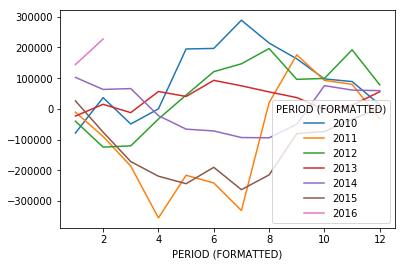

In [38]:
%matplotlib inline
pv.plot()

In [43]:
# Getting only best values from Year when market is rising
year=[2011,2014,2015,2016]
X_train[X_train.year != year]

AttributeError: 'DataFrame' object has no attribute 'year'

In [67]:
df_Rising = X_train[(X_train['PERIOD (FORMATTED)'].dt.year ==2010) | (X_train['PERIOD (FORMATTED)'].dt.year ==2012) |(X_train['PERIOD (FORMATTED)'].dt.year ==2013)]


In [83]:
import datetime as dt
max(df_Rising['PERIOD (FORMATTED)'].dt.year)

2013

In [68]:
df_Rising.head()

,IDENTIFIER,PERIOD (FORMATTED),RANK,1M_RET,MCAP,1SS_ERNQLT,IST_SURPY1,ACCX,ARM_PFD_COMP,RET24M_L1M,...,CASH_P.1,EV.1,RVM_CFO_AST.1,VALUE_COM.1,QUALITY.1,RISK,TECHNICAL1.1,PP_RANK,FUTURE 24 WEEK RETURNS,Excess
357,244097,2013-07-19,-0.396952,-0.000929,-0.002078,0.311865,-0.005627,0.247988,0.448534,-0.003373,...,0.001942,-0.002096,0.042859,-0.024160,0.184801,0.040879,-0.069352,0.118859,-16.806835,-20.077810
358,619560,2013-07-19,-0.114123,0.000178,-0.000580,-0.435610,-0.000806,0.053920,-0.127223,-0.001795,...,-0.001031,0.002389,-0.061093,-0.025668,-0.014465,0.098685,0.165288,0.391586,-12.011481,-15.282457
359,220015,2013-07-26,-0.437356,0.000150,-0.001867,-0.001266,0.001448,0.010291,0.206110,-0.003808,...,0.000878,-0.001901,0.012094,0.026129,-0.031957,-0.065077,-0.060646,0.169364,4.742842,1.471867
360,41987010,2013-08-02,0.259614,0.000764,-0.002002,-0.183085,0.000105,-0.067892,-0.096920,-0.000906,...,-0.001204,-0.001920,0.024269,0.045897,0.045009,-0.019655,-0.086711,-0.153868,0.148528,-3.122447
361,30040W10,2013-08-02,0.148503,0.000868,-0.000103,-0.435610,0.000222,0.003119,0.064696,-0.000416,...,-0.002541,0.000119,-0.030202,-0.006329,0.051355,0.021340,-0.017530,-0.032656,-3.057422,-6.328397


In [81]:
df_Decreasing = X_train[(X_train['PERIOD (FORMATTED)'].dt.year ==2011) | (X_train['PERIOD (FORMATTED)'].dt.year ==2014) |(X_train['PERIOD (FORMATTED)'].dt.year ==2015)]


In [82]:
min(df_Decreasing['PERIOD (FORMATTED)'].dt.year)

2011

In [85]:
df_train=X_train[cols]

In [86]:
y=X_train['Excess']

In [93]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
from sklearn import metrics

In [134]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(X_train[cols], X_train['Excess'])

In [242]:
df_test=pd.read_csv('Pr_test_20.csv',parse_dates=['PERIOD (FORMATTED)'],
                 infer_datetime_format=True, encoding='utf-8')

In [135]:
Preds_Excess_2=model2.predict(df_test[cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.948325137784831

In [103]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_Rising[cols],df_Rising['Excess'])

In [104]:
Preds_Excess_2=model2.predict(df_test[cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

19.450460786072259

In [105]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_Decreasing[cols],df_Decreasing['Excess'])

In [106]:
Preds_Excess_2=model2.predict(df_test[cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

19.569808689819126

In [236]:
cols_keep=['PERIOD (FORMATTED)','IDENTIFIER','RET24M_L1M','ARM_PFD_COMP','1SS_ERNQLT','PP_RANK','RISK','Excess']
cols=['RET24M_L1M','ARM_PFD_COMP','1SS_ERNQLT','PP_RANK','RISK']

In [239]:
#X_train.groupby('IDENTIFIER')['RANK'].apply(pd.rolling_mean, 2, min_periods=1)
X_train=X_train[cols_keep]
X_train.head()

,PERIOD (FORMATTED),IDENTIFIER,RET24M_L1M,ARM_PFD_COMP,1SS_ERNQLT,PP_RANK,RISK,Excess
0,2015-08-07,B66Y3W,-0.002757,-0.288839,0.001082,-0.244777,0.014736,-25.108537
1,2015-08-14,46625H10,0.000010,-0.036314,0.018936,0.068354,0.005954,-14.344045
2,2015-08-14,22531010,0.004571,0.236413,0.130047,-0.436697,0.059482,-16.692228
3,2015-08-14,68193610,-0.000507,0.256615,-0.354802,-0.315484,0.011318,-13.234320
4,2015-08-14,05348410,-0.000229,0.377827,0.018936,-0.396293,0.020004,-5.039901


In [240]:
for val in cols:
    X_train[val+'_Rol'] = X_train.groupby('IDENTIFIER')[val].rolling(24).mean().reset_index(0,drop=True)

In [241]:
X_train.head()

,PERIOD (FORMATTED),IDENTIFIER,RET24M_L1M,ARM_PFD_COMP,1SS_ERNQLT,PP_RANK,RISK,Excess,RET24M_L1M_Rol,ARM_PFD_COMP_Rol,1SS_ERNQLT_Rol,PP_RANK_Rol,RISK_Rol
0,2015-08-07,B66Y3W,-0.002757,-0.288839,0.001082,-0.244777,0.014736,-25.108537,NaN,NaN,NaN,NaN,NaN
1,2015-08-14,46625H10,0.000010,-0.036314,0.018936,0.068354,0.005954,-14.344045,NaN,NaN,NaN,NaN,NaN
2,2015-08-14,22531010,0.004571,0.236413,0.130047,-0.436697,0.059482,-16.692228,NaN,NaN,NaN,NaN,NaN
3,2015-08-14,68193610,-0.000507,0.256615,-0.354802,-0.315484,0.011318,-13.234320,NaN,NaN,NaN,NaN,NaN
4,2015-08-14,05348410,-0.000229,0.377827,0.018936,-0.396293,0.020004,-5.039901,NaN,NaN,NaN,NaN,NaN


In [243]:
df_test=df_test[cols_keep]
for val in cols:
    df_test[val+'_Rol'] = df_test.groupby('IDENTIFIER')[val].rolling(24).mean().reset_index(0,drop=True)

df_test.head()



,PERIOD (FORMATTED),IDENTIFIER,RET24M_L1M,ARM_PFD_COMP,1SS_ERNQLT,PP_RANK,RISK,Excess,RET24M_L1M_Rol,ARM_PFD_COMP_Rol,1SS_ERNQLT_Rol,PP_RANK_Rol,RISK_Rol
0,2016-09-02,040828,-0.004151,0.347524,-0.334600,0.482495,0.116931,-1.194258,NaN,NaN,NaN,NaN,NaN
1,2016-09-02,75935160,-0.000223,0.165706,-0.223489,0.068354,-0.031525,9.699813,NaN,NaN,NaN,NaN,NaN
2,2016-09-02,604978,-0.000638,0.357625,-0.304297,0.351182,0.055283,-19.711595,NaN,NaN,NaN,NaN,NaN
3,2016-09-02,607572,-0.002547,0.024292,-0.041670,-0.042757,0.045635,6.848615,NaN,NaN,NaN,NaN,NaN
4,2016-09-02,615667,-0.002400,0.004289,0.109845,0.001638,-0.029005,18.721764,NaN,NaN,NaN,NaN,NaN


In [244]:
X_train.isnull().values.any()
X_train.isnull().sum()

PERIOD (FORMATTED)         0
IDENTIFIER                 0
RET24M_L1M                 0
ARM_PFD_COMP               0
1SS_ERNQLT                 0
PP_RANK                    0
RISK                       0
Excess                     0
RET24M_L1M_Rol        107467
ARM_PFD_COMP_Rol      107467
1SS_ERNQLT_Rol        107467
PP_RANK_Rol           107467
RISK_Rol              107467
dtype: int64

In [245]:
df_test.isnull().values.any()
df_test.isnull().sum()

PERIOD (FORMATTED)        0
IDENTIFIER                0
RET24M_L1M                0
ARM_PFD_COMP              0
1SS_ERNQLT                0
PP_RANK                   0
RISK                      0
Excess                    0
RET24M_L1M_Rol        82373
ARM_PFD_COMP_Rol      82373
1SS_ERNQLT_Rol        82373
PP_RANK_Rol           82373
RISK_Rol              82373
dtype: int64

In [246]:

X_train=X_train.dropna(subset=['RET24M_L1M_Rol','ARM_PFD_COMP_Rol','1SS_ERNQLT_Rol','PP_RANK_Rol','RISK_Rol' ])
X_train.isnull().values.any()
X_train.isnull().sum()

PERIOD (FORMATTED)    0
IDENTIFIER            0
RET24M_L1M            0
ARM_PFD_COMP          0
1SS_ERNQLT            0
PP_RANK               0
RISK                  0
Excess                0
RET24M_L1M_Rol        0
ARM_PFD_COMP_Rol      0
1SS_ERNQLT_Rol        0
PP_RANK_Rol           0
RISK_Rol              0
dtype: int64

In [247]:
df_test=df_test.dropna(subset=['RET24M_L1M_Rol','ARM_PFD_COMP_Rol','1SS_ERNQLT_Rol','PP_RANK_Rol','RISK_Rol' ])
df_test.isnull().values.any()
df_test.isnull().sum()

PERIOD (FORMATTED)    0
IDENTIFIER            0
RET24M_L1M            0
ARM_PFD_COMP          0
1SS_ERNQLT            0
PP_RANK               0
RISK                  0
Excess                0
RET24M_L1M_Rol        0
ARM_PFD_COMP_Rol      0
1SS_ERNQLT_Rol        0
PP_RANK_Rol           0
RISK_Rol              0
dtype: int64

## Extra Tree

In [326]:
new_cols=['RET24M_L1M','ARM_PFD_COMP','1SS_ERNQLT','PP_RANK','RISK','RET24M_L1M_Rol','ARM_PFD_COMP_Rol','1SS_ERNQLT_Rol','PP_RANK_Rol','RISK_Rol']
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(X_train[new_cols],X_train['Excess'])

In [327]:
Preds_Excess_2=model2.predict(df_test[new_cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.955847804472413

In [256]:
#MAE
metrics.mean_absolute_error(df_test['Excess'],Preds_Excess_2)

13.63528215230043

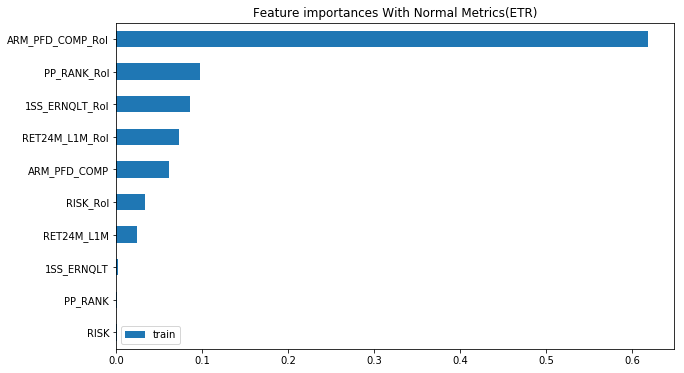

In [254]:
imp = pd.DataFrame(index=new_cols)
imp['train'] = pd.Series(model2.feature_importances_, index=new_cols)
ax = imp.sort_values('train').tail(10).plot.barh(title='Feature importances With Normal Metrics(ETR)', figsize=(10,6))

## Linear Model

In [260]:
lm_model=lm.LinearRegression()
lm_model.fit(X_train[new_cols], X_train['Excess'])

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [261]:
Preds_Excess=lm_model.predict(df_test[new_cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess))

19.06911870624187

## Ridge

In [263]:
Rid=Ridge()
model3=Rid.fit(X_train[new_cols], X_train['Excess'])

In [264]:
Preds_Excess_4=model3.predict(df_test[new_cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4))

19.073033300521676

## Without Lag ET

### ET

In [271]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=5, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(X_train[cols],X_train['Excess'])

In [272]:
Preds_Excess_2=model2.predict(df_test[cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.916727641651939

### Ridge

In [267]:
Rid=Ridge()
model3=Rid.fit(X_train[cols], X_train['Excess'])

In [268]:
Preds_Excess_4=model3.predict(df_test[cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4))

18.937075504335581

In [276]:
Preds_Excess_3=(model2.predict(df_test[cols])*0.95)+(model3.predict(df_test[cols])*0.05)
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_3))

18.916026357938577

In [277]:
cols

['RET24M_L1M', 'ARM_PFD_COMP', '1SS_ERNQLT', 'PP_RANK', 'RISK']

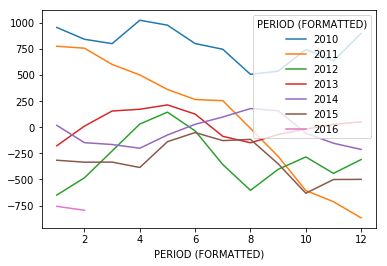

In [280]:
X_train=X_train.set_index('PERIOD (FORMATTED)')
pv = pd.pivot_table(X_train, index=X_train.index.month, columns=X_train.index.year,
                    values='ARM_PFD_COMP', aggfunc='sum')
pv
pv.plot()

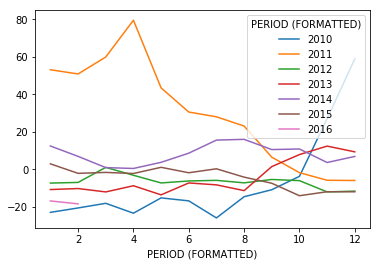

In [281]:
pv = pd.pivot_table(X_train, index=X_train.index.month, columns=X_train.index.year,
                    values='RET24M_L1M', aggfunc='sum')
pv
pv.plot()

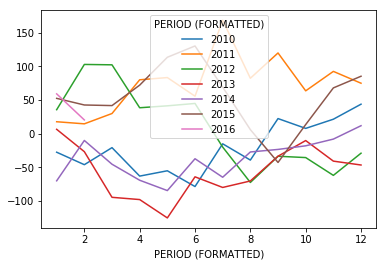

In [282]:
pv = pd.pivot_table(X_train, index=X_train.index.month, columns=X_train.index.year,
                    values='1SS_ERNQLT', aggfunc='sum')
pv
pv.plot()

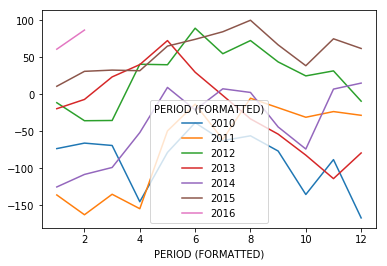

In [283]:
pv = pd.pivot_table(X_train, index=X_train.index.month, columns=X_train.index.year,
                    values='PP_RANK', aggfunc='sum')
pv
pv.plot()

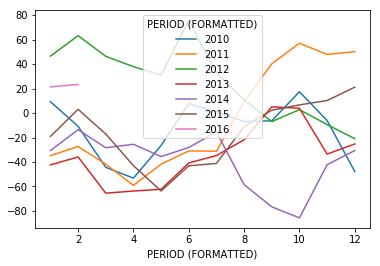

In [284]:
pv = pd.pivot_table(X_train, index=X_train.index.month, columns=X_train.index.year,
                    values='RISK', aggfunc='sum')
pv
pv.plot()

In [286]:
X_train.head()

,IDENTIFIER,RET24M_L1M,ARM_PFD_COMP,1SS_ERNQLT,PP_RANK,RISK,Excess,RET24M_L1M_Rol,ARM_PFD_COMP_Rol,1SS_ERNQLT_Rol,PP_RANK_Rol,RISK_Rol
PERIOD (FORMATTED),,,,,,,,,,,,
2013-05-31,268236,-0.003591,0.024292,0.001082,0.351182,-0.084997,-8.056525,-0.002637,-0.069910,-0.120815,0.208505,-0.060759
2014-08-29,05561Q20,-0.000534,0.367726,0.301764,-0.032656,-0.050128,-14.086170,-0.000002,0.104679,0.115737,-0.158498,-0.079517
2016-02-05,55261F10,-0.001135,-0.107021,0.008835,-0.062959,-0.008794,4.231888,0.000140,0.057541,0.084592,-0.052858,-0.029239
2015-10-23,BYXS69,-0.000159,-0.096920,0.001082,0.482495,-0.000026,-14.095878,-0.000827,-0.096499,-0.074822,0.145374,-0.010236
2015-10-30,BYXS69,-0.000571,-0.268637,0.001082,0.492596,-0.000026,-8.189619,-0.000805,-0.110809,-0.071778,0.170206,-0.008719


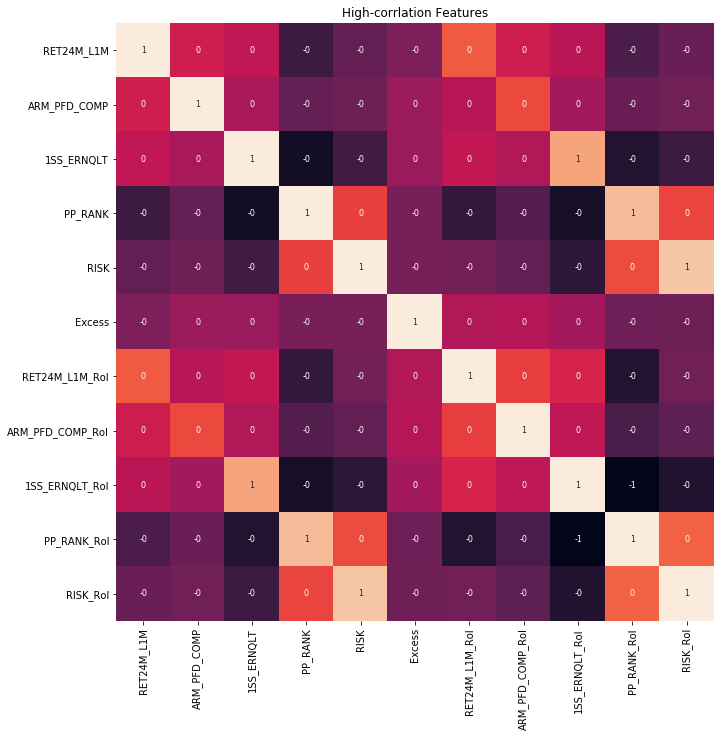

In [287]:
import seaborn as sns
corrmat = X_train.corr(method='spearman')
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(corrmat, cbar=False, annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8})
plt.title('High-corrlation Features')
plt.show()

In [295]:
df_Rising = X_train[(X_train['PERIOD (FORMATTED)'].dt.year ==2011) | (X_train['PERIOD (FORMATTED)'].dt.year ==2012) |(X_train['PERIOD (FORMATTED)'].dt.year ==2013)]


In [296]:
X_train.columns

Index(['PERIOD (FORMATTED)', 'IDENTIFIER', 'RET24M_L1M', 'ARM_PFD_COMP',
       '1SS_ERNQLT', 'PP_RANK', 'RISK', 'Excess', 'RET24M_L1M_Rol',
       'ARM_PFD_COMP_Rol', '1SS_ERNQLT_Rol', 'PP_RANK_Rol', 'RISK_Rol'],
      dtype='object')

In [297]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=5, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(X_train[cols],X_train['Excess'])

In [298]:
Preds_Excess_2=model2.predict(df_test[cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.912737148408176

In [328]:
df_test['Excess_Predicted_ET_Lag']=Preds_Excess_2

In [350]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
print ("Current size:", fig_size)

Current size: [6.0, 4.0]
Current size: [12, 10]


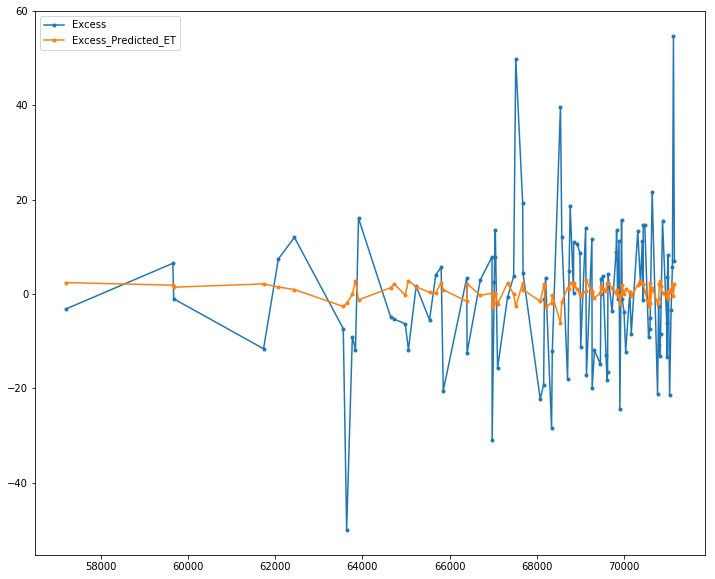

In [427]:
# Non-Lag Features
df_test.set_index('PERIOD (FORMATTED)')
df_test[['Excess','Excess_Predicted_ET']].iloc[:100,:].plot(marker='.')

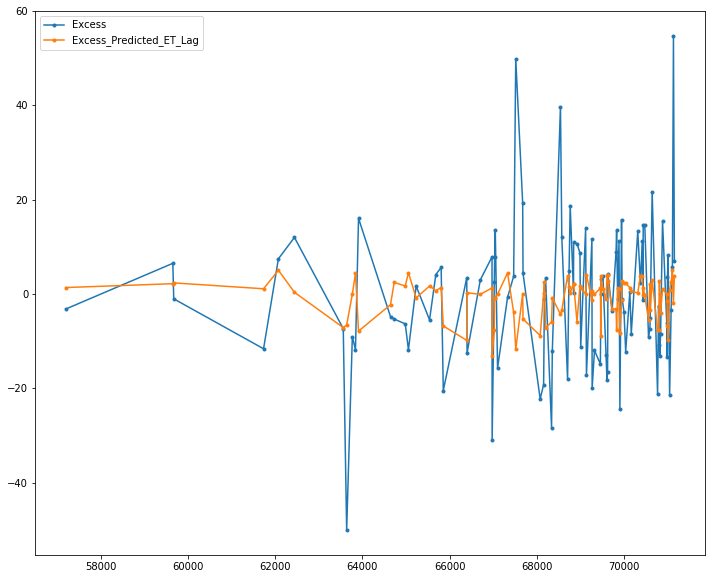

In [352]:
df_test[['Excess','Excess_Predicted_ET_Lag']].iloc[:100,:].plot(marker='.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dbfc6d8>]], dtype=object)

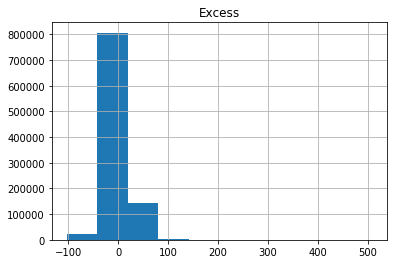

In [331]:
X_train.hist(column='Excess')

In [335]:
min(X_train['Excess'])

-102.84259216930641

In [353]:
temp=X_train[X_train.Excess <= 20]

In [354]:
temp=temp[temp.Excess >= -20]


In [355]:
len(temp['Excess'])

692483

In [356]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(temp[new_cols],temp['Excess'])

In [357]:
Preds_Excess_2=model2.predict(df_test[new_cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.861968926059834

In [358]:
df_test['Excess_Predicted_ET_Lag_Clipped']=Preds_Excess_2

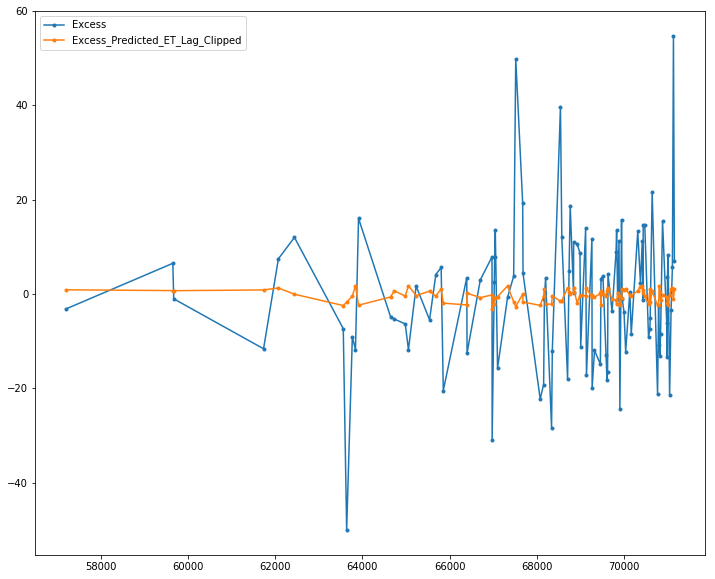

In [359]:
df_test[['Excess','Excess_Predicted_ET_Lag_Clipped']].iloc[:100,:].plot(marker='.')

In [388]:
#Lag
rol=['RET24M_L1M','ARM_PFD_COMP','1SS_ERNQLT','PP_RANK','RISK']

In [385]:
for rol in rol:
    df_test[rol+'_LagDiff']=df_test[rol]-df_test[rol+"_Rol"]

In [368]:
for rol in rol:
    X_train[rol+'_LagDiff']=X_train[rol]-X_train[rol+"_Rol"]

KeyError: 'R'

In [372]:
X_train.head()

,PERIOD (FORMATTED),IDENTIFIER,RET24M_L1M,ARM_PFD_COMP,1SS_ERNQLT,PP_RANK,RISK,Excess,RET24M_L1M_Rol,ARM_PFD_COMP_Rol,...,RET24M_L1MLagDiff,ARM_PFD_COMPLagDiff,1SS_ERNQLTLagDiff,PP_RANKLagDiff,RISKLagDiff,RET24M_L1M_SUM,ARM_PFD_COMP_SUM,1SS_ERNQLT_SUM,PP_RANK_SUM,RISK_SUM
0,2013-05-31,268236,-0.003591,0.024292,0.001082,0.351182,-0.084997,-8.056525,-0.002637,-0.069910,...,-0.000955,0.094202,0.121897,0.142677,-0.024238,-0.006228,-0.045618,-0.119733,0.559688,-0.145757
1,2014-08-29,05561Q20,-0.000534,0.367726,0.301764,-0.032656,-0.050128,-14.086170,-0.000002,0.104679,...,-0.000532,0.263047,0.186027,0.125842,0.029389,-0.000535,0.472405,0.417501,-0.191154,-0.129645
2,2016-02-05,55261F10,-0.001135,-0.107021,0.008835,-0.062959,-0.008794,4.231888,0.000140,0.057541,...,-0.001275,-0.164562,-0.075758,-0.010101,0.020445,-0.000995,-0.049480,0.093427,-0.115817,-0.038033
3,2015-10-23,BYXS69,-0.000159,-0.096920,0.001082,0.482495,-0.000026,-14.095878,-0.000827,-0.096499,...,0.000668,-0.000421,0.075904,0.337121,0.010210,-0.000986,-0.193419,-0.073740,0.627869,-0.010262
4,2015-10-30,BYXS69,-0.000571,-0.268637,0.001082,0.492596,-0.000026,-8.189619,-0.000805,-0.110809,...,0.000234,-0.157828,0.072860,0.322391,0.008693,-0.001376,-0.379446,-0.070696,0.662802,-0.008745


In [386]:
df_test.head()

,PERIOD (FORMATTED),IDENTIFIER,RET24M_L1M,ARM_PFD_COMP,1SS_ERNQLT,PP_RANK,RISK,Excess,RET24M_L1M_Rol,ARM_PFD_COMP_Rol,...,PP_RANK_Rol,RISK_Rol,Excess_Predicted_ET,Excess_Predicted_ET_Lag,Excess_Predicted_ET_Lag_Clipped,RET24M_L1M_LagDiff,ARM_PFD_COMP_LagDiff,1SS_ERNQLT_LagDiff,PP_RANK_LagDiff,RISK_LagDiff
57198,2016-09-16,94262220,0.001478,-0.026213,0.392673,-0.396293,-0.054733,-3.185994,0.001213,-0.035472,...,-0.408919,-0.059510,2.434844,1.377404,0.904947,0.000265,0.009259,0.030303,0.012626,0.004777
59655,2016-12-09,688507,0.001029,-0.046415,0.261360,-0.335687,-0.021561,6.519625,0.001616,0.007457,...,-0.326006,-0.022514,1.883203,2.197352,0.730837,-0.000588,-0.053872,-0.021044,-0.009680,0.000953
59676,2017-02-10,688507,0.001696,0.175807,0.261360,-0.093262,-0.020787,-1.013153,0.001653,0.009982,...,-0.316747,-0.022566,1.460053,2.367790,0.716519,0.000043,0.165825,-0.021044,0.223485,0.001779
61735,2016-12-23,94262220,0.000956,-0.107021,0.342168,-0.406394,-0.043878,-11.603564,0.001185,-0.037577,...,-0.409340,-0.058943,2.150025,1.121480,0.869899,-0.000229,-0.069444,-0.017677,0.002946,0.015065
62075,2016-11-11,90384S30,0.003631,0.276817,0.220956,-0.456899,-0.022081,7.476496,0.004240,0.258720,...,-0.469525,-0.046741,1.494262,5.052638,1.293216,-0.000609,0.018098,-0.036195,0.012626,0.024660


In [371]:
for rol in rol:
    X_train[rol+'_SUM']=X_train[rol]+X_train[rol+"_Rol"]

In [389]:
for rol in rol:
    df_test[rol+'_SUM']=df_test[rol]+df_test[rol+"_Rol"]

In [378]:
t_cols = [x for x in X_train.columns.values if x not in ['PERIOD (FORMATTED)',
 'IDENTIFIER','Excess']]

In [379]:
t_cols

['RET24M_L1M',
 'ARM_PFD_COMP',
 '1SS_ERNQLT',
 'PP_RANK',
 'RISK',
 'RET24M_L1M_Rol',
 'ARM_PFD_COMP_Rol',
 '1SS_ERNQLT_Rol',
 'PP_RANK_Rol',
 'RISK_Rol',
 'RET24M_L1MLagDiff',
 'ARM_PFD_COMPLagDiff',
 '1SS_ERNQLTLagDiff',
 'PP_RANKLagDiff',
 'RISKLagDiff',
 'RET24M_L1M_SUM',
 'ARM_PFD_COMP_SUM',
 '1SS_ERNQLT_SUM',
 'PP_RANK_SUM',
 'RISK_SUM']

In [381]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(X_train[t_cols],X_train['Excess'])

In [395]:
t_cols = [x for x in df_test.columns.values if x not in ['Excess_Predicted_ET',
 'Excess_Predicted_ET_Lag',
 'Excess_Predicted_ET_Lag_Clipped','PERIOD (FORMATTED)','IDENTIFIER','Excess']]

In [396]:
t_cols

['RET24M_L1M',
 'ARM_PFD_COMP',
 '1SS_ERNQLT',
 'PP_RANK',
 'RISK',
 'RET24M_L1M_Rol',
 'ARM_PFD_COMP_Rol',
 '1SS_ERNQLT_Rol',
 'PP_RANK_Rol',
 'RISK_Rol',
 'RET24M_L1M_LagDiff',
 'ARM_PFD_COMP_LagDiff',
 '1SS_ERNQLT_LagDiff',
 'PP_RANK_LagDiff',
 'RISK_LagDiff',
 'RET24M_L1M_SUM',
 'ARM_PFD_COMP_SUM',
 '1SS_ERNQLT_SUM',
 'PP_RANK_SUM',
 'RISK_SUM']

In [397]:
Preds_Excess_2=model2.predict(df_test[t_cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.974492973403702

In [400]:
df_test['Excess_Predicted_ET_Lag_1']=Preds_Excess_2

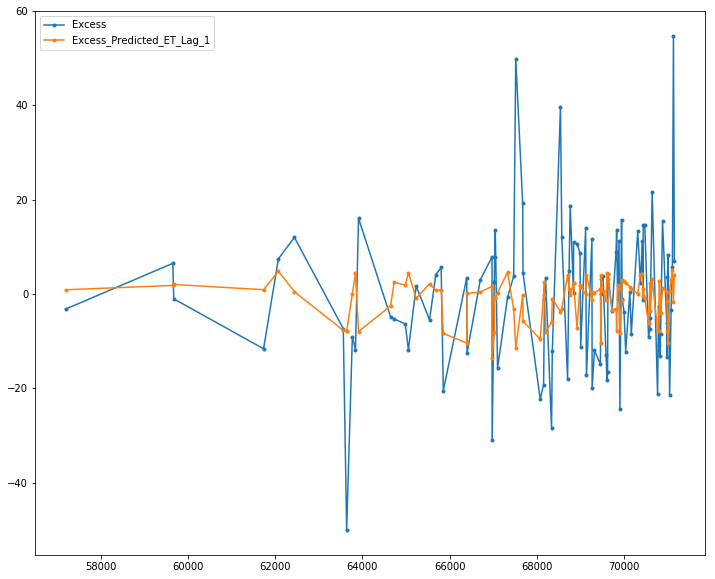

In [401]:
df_test[['Excess','Excess_Predicted_ET_Lag_1']].iloc[:100,:].plot(marker='.')

In [402]:
max(df_test['Excess'])

245.31774193652492

In [403]:
temp=df_test[df_test.Excess <= 40]
temp=temp[temp.Excess >= -40]

In [404]:
Preds_Excess_2=model2.predict(df_test[t_cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.974492973403702

## Changing TimeStamp

In [406]:
X_t=X_train.loc[(X_train['PERIOD (FORMATTED)'].dt.year >= 2011) & (X_train['PERIOD (FORMATTED)'].dt.year < 2013)]

In [409]:
X_test=X_train.loc[(X_train['PERIOD (FORMATTED)'].dt.month >= 6) & (X_train['PERIOD (FORMATTED)'].dt.year == 2014)]

In [410]:
X_t.head()

,PERIOD (FORMATTED),IDENTIFIER,RET24M_L1M,ARM_PFD_COMP,1SS_ERNQLT,PP_RANK,RISK,Excess,RET24M_L1M_Rol,ARM_PFD_COMP_Rol,...,RET24M_L1MLagDiff,ARM_PFD_COMPLagDiff,1SS_ERNQLTLagDiff,PP_RANKLagDiff,RISKLagDiff,RET24M_L1M_SUM,ARM_PFD_COMP_SUM,1SS_ERNQLT_SUM,PP_RANK_SUM,RISK_SUM
7,2012-11-02,B0CRCP,0.000583,-0.086819,0.210855,-0.325585,-0.013741,14.922325,-0.000253,0.009140,...,0.000836,-0.095960,2.651515e-02,-0.227273,0.012388,0.000330,-0.077679,0.395194,-0.423898,-0.039869
11,2012-08-10,618666,0.007268,-0.399950,0.362370,-0.456899,0.040446,-12.455326,0.001626,0.089949,...,0.005642,-0.489899,2.617845e-01,-0.192761,0.067474,0.008895,-0.310002,0.462955,-0.721036,0.013419
23,2012-08-03,660990,0.000739,0.004289,0.001082,0.320879,0.041109,45.387430,0.001946,0.009306,...,-0.001208,-0.005017,-4.336809e-19,0.137626,0.040165,0.002685,0.013595,0.002164,0.504132,0.042052
25,2011-08-26,B0CRCP,0.000939,-0.016112,-0.132580,0.048152,-0.044443,13.372319,-0.000193,0.017558,...,0.001132,-0.033670,-3.211279e-01,0.143098,-0.014449,0.000746,0.001446,0.055969,-0.046794,-0.074438
37,2012-01-06,G5480U12,0.002545,0.004289,0.001082,0.001638,0.060106,11.158728,0.003241,0.003818,...,-0.000695,0.000471,-4.336809e-19,0.000000,0.001487,0.005786,0.008107,0.002164,0.003276,0.118725


In [418]:
t_cols = [x for x in X_t.columns.values if x not in ['Excess_Predicted_ET',
 'Excess_Predicted_ET_Lag',
 'Excess_Predicted_ET_Lag_Clipped','PERIOD (FORMATTED)','IDENTIFIER','Excess']]

In [412]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(X_t[t_cols],X_t['Excess'])

In [424]:
t_cols = [x for x in X_test.columns.values if x not in ['Excess_Predicted_ET',
 'Excess_Predicted_ET_Lag',
 'Excess_Predicted_ET_Lag_Clipped','PERIOD (FORMATTED)','IDENTIFIER','Excess']]

In [417]:
Preds_Excess_2=model2.predict(X_test[t_cols])
#RMSE
np.sqrt(metrics.mean_squared_error(X_test['Excess'],Preds_Excess_2))

23.373024189106015

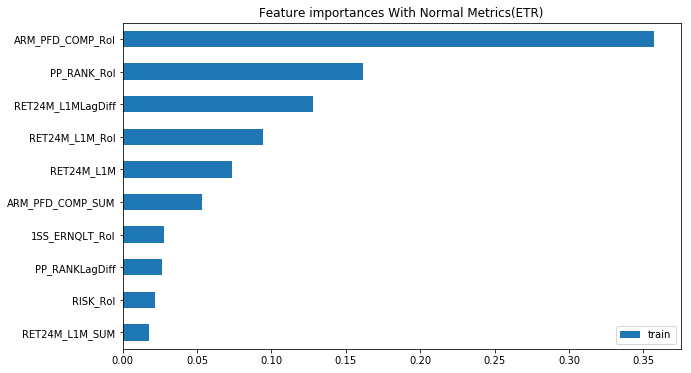

In [419]:
imp = pd.DataFrame(index=t_cols)
imp['train'] = pd.Series(model2.feature_importances_, index=t_cols)
ax = imp.sort_values('train').tail(10).plot.barh(title='Feature importances With Normal Metrics(ETR)', figsize=(10,6))

In [420]:
Rid=Ridge()
model3=Rid.fit(X_train[t_cols], X_train['Excess'])

In [426]:
Preds_Excess_4=model3.predict(X_test[t_cols])
#RMSE
np.sqrt(metrics.mean_squared_error(X_test['Excess'],Preds_Excess_4))

23.396862856119192

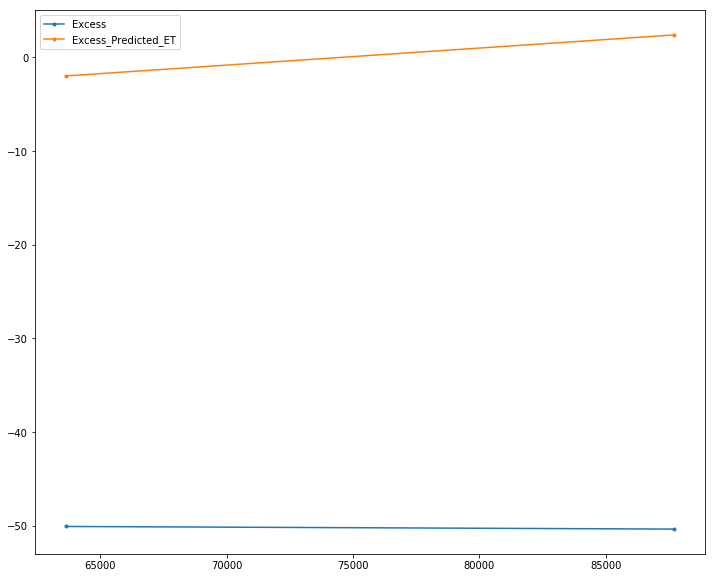

In [445]:
id='G7665A10'
temp1 = df_test[df_test.IDENTIFIER==id]
temp1[['Excess','Excess_Predicted_ET']].iloc[:20,:].plot(marker='.')

In [441]:
count(df_test['IDENTIFIER'])

NameError: name 'count' is not defined

In [440]:
id='G7665A10'
temp1 = df_test[df_test.IDENTIFIER==id]
temp1

,PERIOD (FORMATTED),IDENTIFIER,RET24M_L1M,ARM_PFD_COMP,1SS_ERNQLT,PP_RANK,RISK,Excess,RET24M_L1M_Rol,ARM_PFD_COMP_Rol,...,ARM_PFD_COMP_LagDiff,1SS_ERNQLT_LagDiff,PP_RANK_LagDiff,RISK_LagDiff,RET24M_L1M_SUM,ARM_PFD_COMP_SUM,1SS_ERNQLT_SUM,PP_RANK_SUM,RISK_SUM,Excess_Predicted_ET_Lag_1
63640,2016-12-09,G7665A10,-0.003468,-0.420152,0.443178,0.017849,-0.006034,-50.068574,-0.003132,-0.253065,...,-0.167088,0.000842,-0.065236,-0.003801,-0.006600,-0.673217,0.885514,0.100933,-0.008267,-7.829499
87707,2017-02-03,G7665A10,-0.002247,-0.056516,0.443178,0.027950,-0.013392,-50.348917,-0.003086,-0.239176,...,0.182660,-0.001263,-0.055135,-0.010441,-0.005333,-0.295692,0.887619,0.111034,-0.016344,-6.354032


In [444]:
max(df_test['IDENTIFIER'].value_counts())

2

In [484]:
df_Rising = X_train[(X_train['PERIOD (FORMATTED)'].dt.year ==2013) | (X_train['PERIOD (FORMATTED)'].dt.year ==2014)]
df_r_test=X_train[(X_train['PERIOD (FORMATTED)'].dt.year ==2015) & (X_train['PERIOD (FORMATTED)'].dt.month >= 6) ]

In [485]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_Rising[t_cols],df_Rising['Excess'])

In [486]:
t_cols = [x for x in X_test.columns.values if x not in ['Excess_Predicted_ET',
 'Excess_Predicted_ET_Lag',
 'Excess_Predicted_ET_Lag_Clipped','PERIOD (FORMATTED)','IDENTIFIER','Excess']]
Preds_Excess_2=model2.predict(df_r_test[t_cols])
#RMSE
np.sqrt(metrics.mean_squared_error(df_r_test['Excess'],Preds_Excess_2))

21.908118051094956

In [513]:
df_r_test['IDENTIFIER'].value_counts()

566935      30
P3107610    30
661964      30
B5BHQP      30
12640810    30
26483E10    30
629817      30
26441150    30
B03MSR      30
00971T10    30
672955      30
634427      30
693657      30
B6SPB4      30
25674610    30
614278      30
661950      30
91168410    30
634007      30
618355      30
22002T10    30
B05N80      30
17737610    30
BYX3N4      30
637248      30
666010      30
642872      30
71270410    30
482030      30
02079K30    30
            ..
92242T10     3
87823710     3
67574630     3
63861C10     3
14162410     3
04351G10     3
B01VRK       3
05009510     3
24353710     3
00936310     3
39762410     3
B3CXGM       2
BLY0NY       2
076693       2
660599       2
67421510     2
419689       2
614608       2
53146510     2
55345K10     2
88732J20     2
49926D10     2
92345410     2
81809710     1
40650V10     1
80004C10     1
B128R9       1
13765N10     1
669455       1
75508B10     1
Name: IDENTIFIER, Length: 3612, dtype: int64

In [487]:
df_r_test['Lag']=Preds_Excess_2

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [515]:
id='B03MSR'

temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1


,IDENTIFIER,RET24M_L1M,ARM_PFD_COMP,1SS_ERNQLT,PP_RANK,RISK,Excess,RET24M_L1M_Rol,ARM_PFD_COMP_Rol,1SS_ERNQLT_Rol,...,ARM_PFD_COMPLagDiff,1SS_ERNQLTLagDiff,PP_RANKLagDiff,RISKLagDiff,RET24M_L1M_SUM,ARM_PFD_COMP_SUM,1SS_ERNQLT_SUM,PP_RANK_SUM,RISK_SUM,Lag
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2015-09-25,B03MSR,-0.002579,0.468736,-0.183085,-0.153868,0.020059,15.244846,0.002143,0.105942,0.053868,...,0.362795,-0.236953,6.691919e-02,-0.004811,-0.000436,0.574678,-0.129216,-0.374656,0.044928,4.791616
2015-10-30,B03MSR,-0.002434,0.448534,0.412875,-0.254878,0.013483,13.146633,0.001817,0.079848,0.036612,...,0.368687,0.376263,-4.166667e-02,-0.010755,-0.000617,0.528382,0.449487,-0.468090,0.037721,3.824024
2015-12-25,B03MSR,-0.001731,-0.086819,0.422976,-0.244777,-0.009114,8.836811,0.002324,0.078585,0.093010,...,-0.165404,0.329966,-2.904040e-02,-0.035068,0.000593,-0.008234,0.515986,-0.460514,0.016840,3.672501
2015-06-26,B03MSR,-0.002080,0.327322,0.261360,-0.194272,0.020482,-23.480486,0.000489,0.096262,0.097639,...,0.231061,0.163721,-7.996633e-03,-0.002352,-0.001592,0.423584,0.358999,-0.380548,0.043317,4.039577
2015-07-03,B03MSR,-0.001294,0.327322,0.251259,-0.194272,0.014591,-15.908746,-0.000135,0.094157,0.089643,...,0.233165,0.161616,-1.473064e-02,-0.008480,-0.001429,0.421480,0.340902,-0.373814,0.037663,3.874312
2015-07-24,B03MSR,-0.000727,0.094999,0.251259,-0.194272,0.022454,-19.410059,-0.000002,0.105521,0.078279,...,-0.010522,0.172980,-2.735690e-02,-0.002592,-0.000729,0.200520,0.329538,-0.361188,0.047500,3.959515
2015-06-19,B03MSR,-0.001559,0.458635,0.271461,-0.113464,0.027083,-8.852113,0.000024,0.117726,-0.004633,...,0.340909,0.276094,2.314815e-02,-0.000260,-0.001535,0.576362,0.266827,-0.250077,0.054426,4.458594
2015-11-27,B03MSR,-0.002259,0.347524,0.412875,-0.254878,-0.001131,-0.254756,-0.000022,0.148871,0.026932,...,0.198653,0.385943,-1.174242e-01,-0.025913,-0.002281,0.496395,0.439807,-0.392333,0.023651,5.085670
2015-10-16,B03MSR,-0.002713,0.448534,-0.172984,-0.143767,0.011927,11.448959,0.001220,0.164023,-0.008842,...,0.284512,-0.164141,1.178451e-02,-0.013848,-0.001494,0.612557,-0.181826,-0.299319,0.037703,5.618573


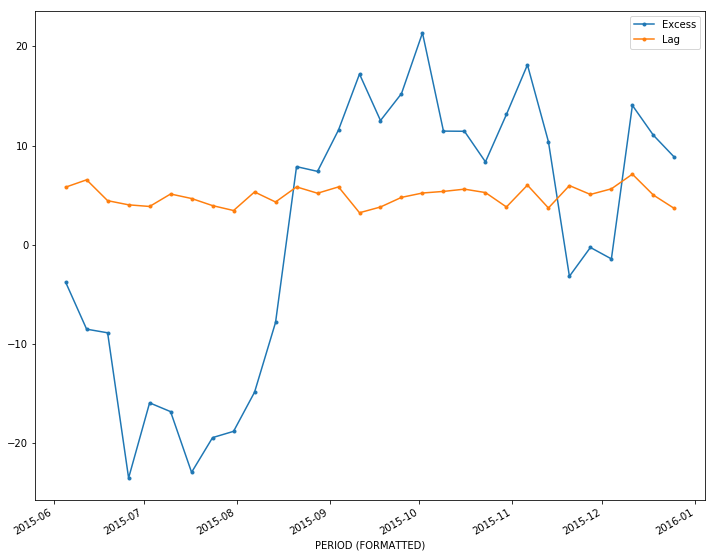

In [516]:
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

In [499]:
df_r_test.columns

Index(['PERIOD (FORMATTED)', 'IDENTIFIER', 'RET24M_L1M', 'ARM_PFD_COMP',
       '1SS_ERNQLT', 'PP_RANK', 'RISK', 'Excess', 'RET24M_L1M_Rol',
       'ARM_PFD_COMP_Rol', '1SS_ERNQLT_Rol', 'PP_RANK_Rol', 'RISK_Rol',
       'RET24M_L1MLagDiff', 'ARM_PFD_COMPLagDiff', '1SS_ERNQLTLagDiff',
       'PP_RANKLagDiff', 'RISKLagDiff', 'RET24M_L1M_SUM', 'ARM_PFD_COMP_SUM',
       '1SS_ERNQLT_SUM', 'PP_RANK_SUM', 'RISK_SUM', 'Lag'],
      dtype='object')

In [531]:
# Capital one USA
id='14040H10'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1

,IDENTIFIER,RET24M_L1M,ARM_PFD_COMP,1SS_ERNQLT,PP_RANK,RISK,Excess,RET24M_L1M_Rol,ARM_PFD_COMP_Rol,1SS_ERNQLT_Rol,...,ARM_PFD_COMPLagDiff,1SS_ERNQLTLagDiff,PP_RANKLagDiff,RISKLagDiff,RET24M_L1M_SUM,ARM_PFD_COMP_SUM,1SS_ERNQLT_SUM,PP_RANK_SUM,RISK_SUM,Lag
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2015-06-05,14040H10,0.000646,0.135403,0.018936,0.038051,0.015069,-8.786267,0.001138,0.180016,0.090484,...,-0.044613,-0.071549,0.016835,-0.012973,0.001784,0.315419,0.109420,0.059267,0.043110,5.544209
2015-08-28,14040H10,-0.000628,-0.117122,-0.082074,0.128960,0.035841,-21.369756,0.001135,0.174965,0.090484,...,-0.292088,-0.172559,0.107323,0.008050,0.000508,0.057843,0.008410,0.150597,0.063632,5.100406
2015-07-24,14040H10,0.001030,-0.268637,-0.001266,0.068354,0.033480,-20.825921,0.001465,0.262087,0.096377,...,-0.530724,-0.097643,0.082071,0.007366,0.002494,-0.006551,0.095110,0.054637,0.059595,5.776630
2015-10-16,14040H10,-0.000625,-0.127223,-0.102277,0.128960,0.035967,-7.386495,0.001327,0.177070,0.134255,...,-0.304293,-0.236532,0.135522,0.003532,0.000702,0.049847,0.031979,0.122398,0.068402,5.394922
2015-09-25,14040H10,-0.000902,-0.066617,-0.092176,0.128960,0.037362,-6.271944,0.000239,0.203164,0.164138,...,-0.269781,-0.256313,0.153199,0.009957,-0.000664,0.136547,0.071962,0.104721,0.064766,5.479237
2015-07-31,14040H10,0.000615,-0.238334,-0.001266,0.088556,0.033930,-25.002408,0.000391,0.171598,0.132572,...,-0.409933,-0.133838,0.103535,0.010356,0.001006,-0.066736,0.131306,0.073576,0.057503,4.989484
2015-08-21,14040H10,0.000243,-0.167627,-0.082074,0.128960,0.035473,-20.071897,0.000236,0.152659,0.098481,...,-0.320286,-0.180556,0.080808,0.008048,0.000479,-0.014968,0.016407,0.177112,0.062898,4.565234
2015-09-04,14040H10,-0.000528,-0.117122,-0.092176,0.128960,0.037778,-14.373872,0.000131,0.135824,0.083750,...,-0.252946,-0.175926,0.063552,0.008632,-0.000397,0.018702,-0.008425,0.194368,0.066924,4.389711
2015-08-14,14040H10,0.000278,-0.167627,-0.071973,0.128960,0.034761,-22.054354,0.000444,0.188854,0.088380,...,-0.356481,-0.160354,0.063973,0.005164,0.000722,0.021227,0.016407,0.193947,0.064358,4.936673


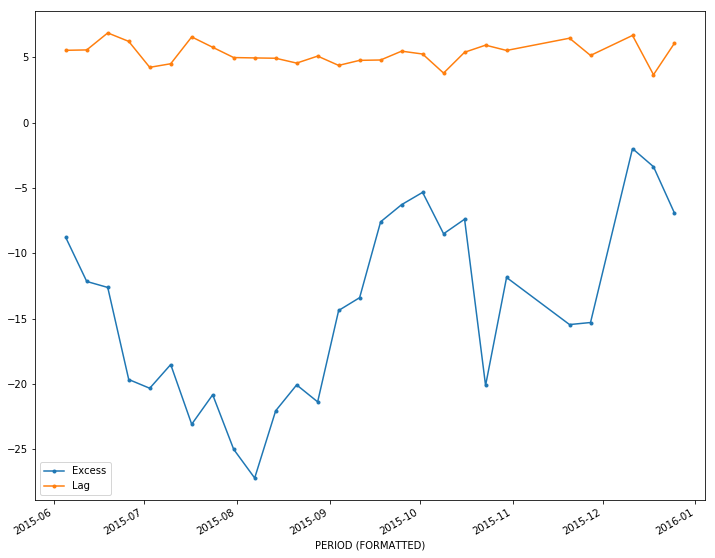

In [532]:
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

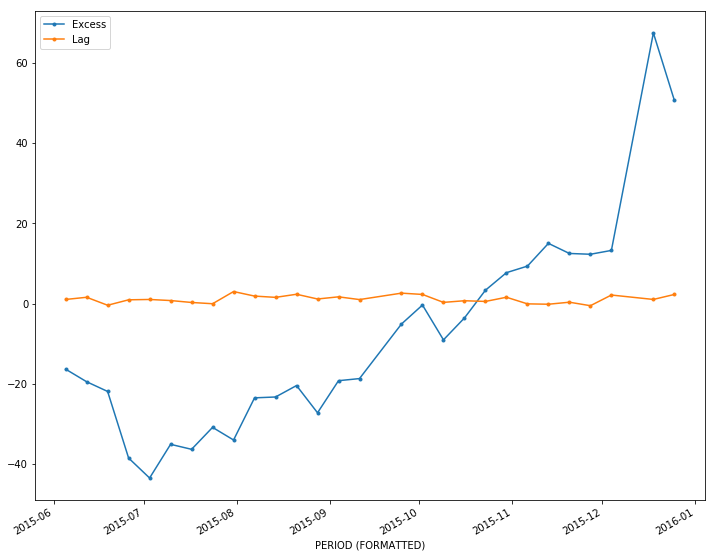

In [536]:
# TMX Group Ltd. canada
id='B8KH5G'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

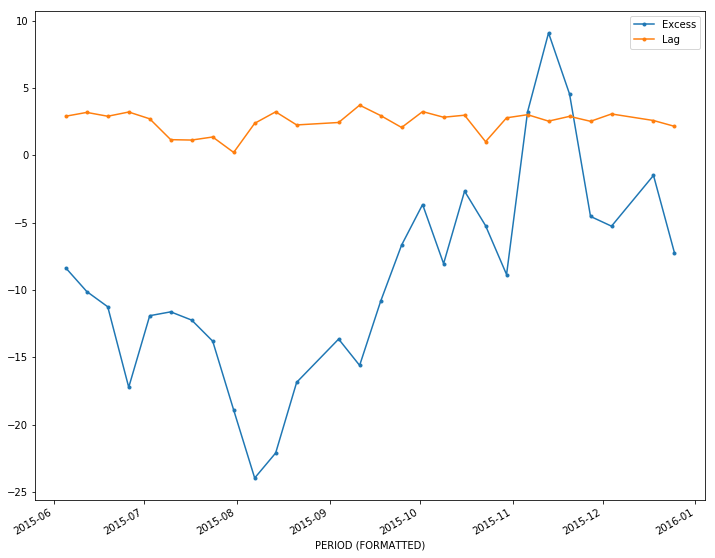

In [537]:
#Brenntag AG . Europe
id='B4YVF5'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

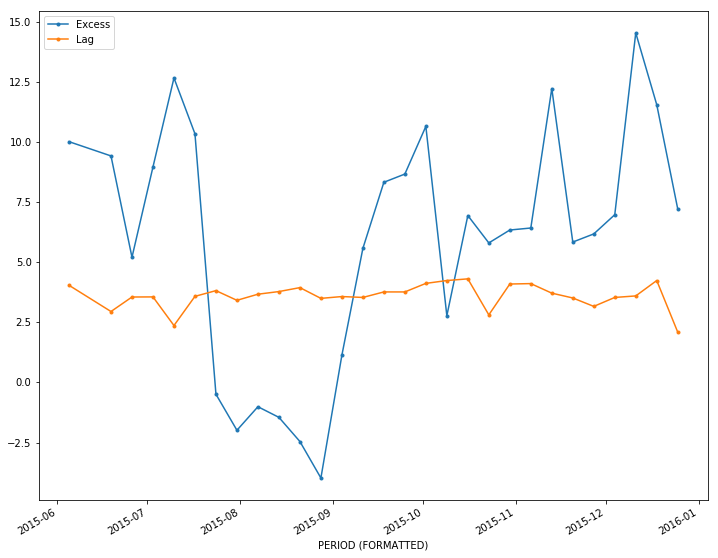

In [538]:
# Equifax Inc. USA
id='29442910'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

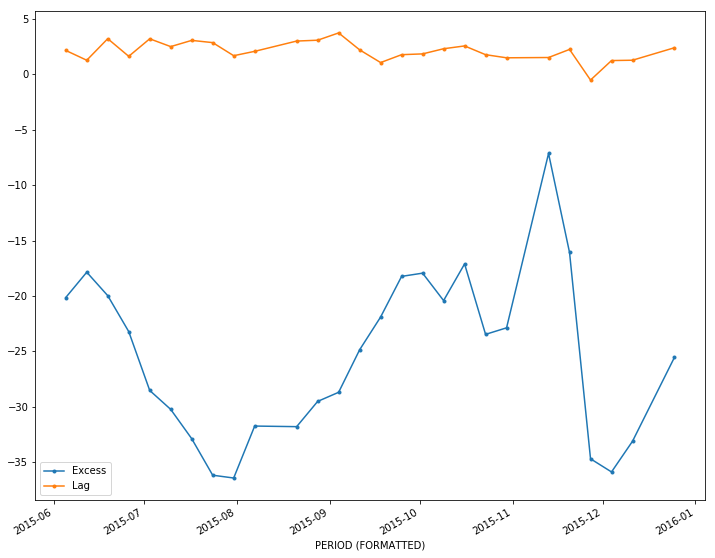

In [539]:
#Nordstorm USA
id='65566410'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

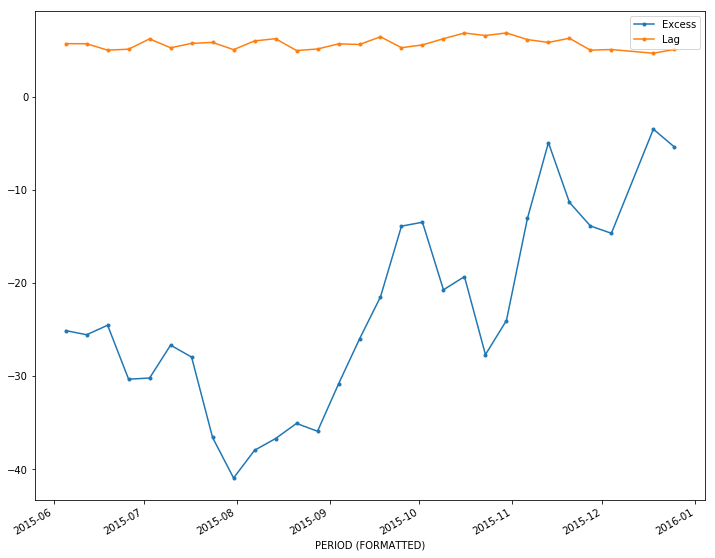

In [540]:

#Magna International Inc. canada
id='255447'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

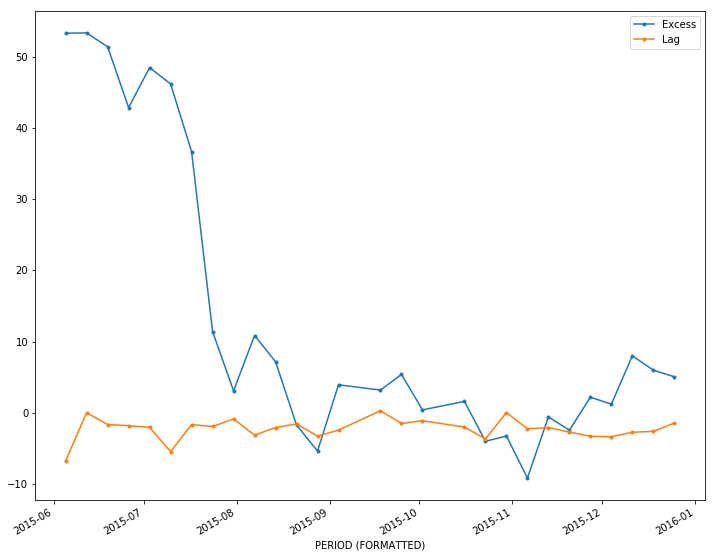

In [541]:


# Amazon USA
id='02313510'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

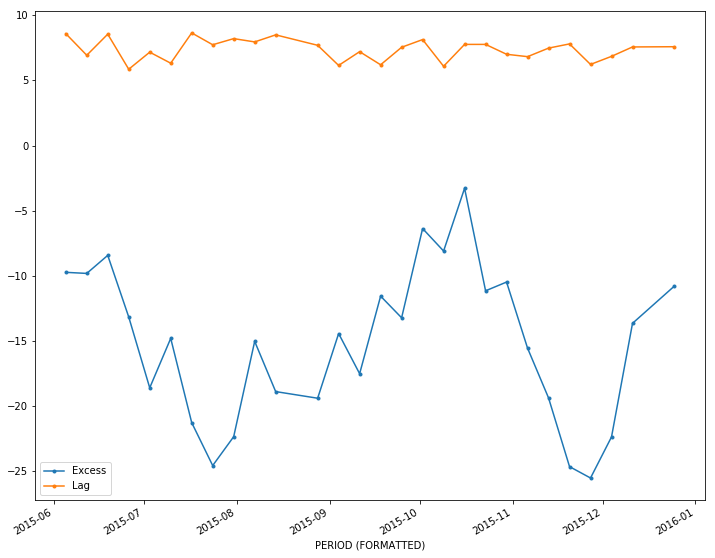

In [542]:
# Apple USA
id='03783310'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

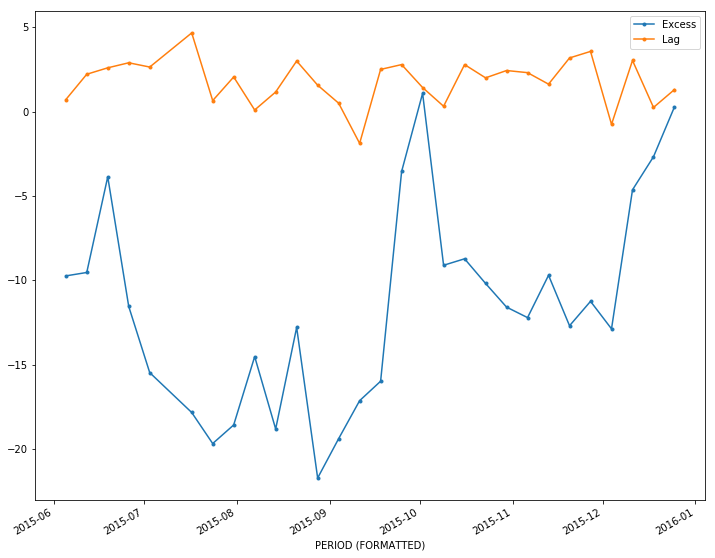

In [543]:
#Agrium . USA Materials
id='221353'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

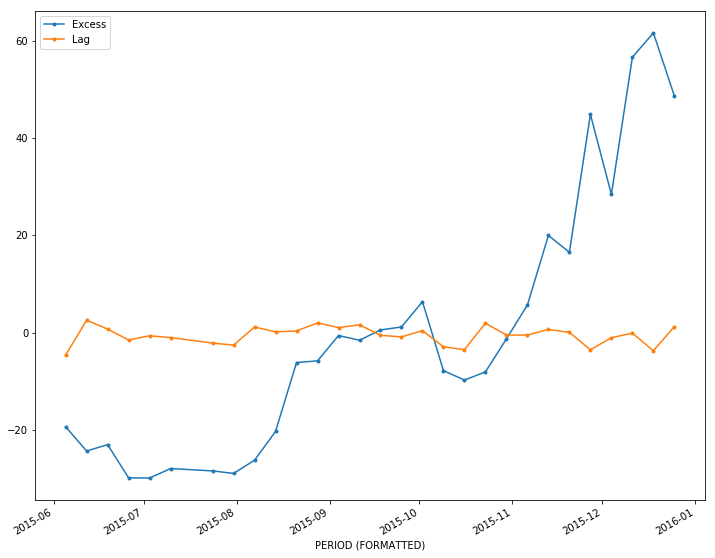

In [544]:
#Indorama Ventures Public Co. Ltd. .  China
id='B5VSK2'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

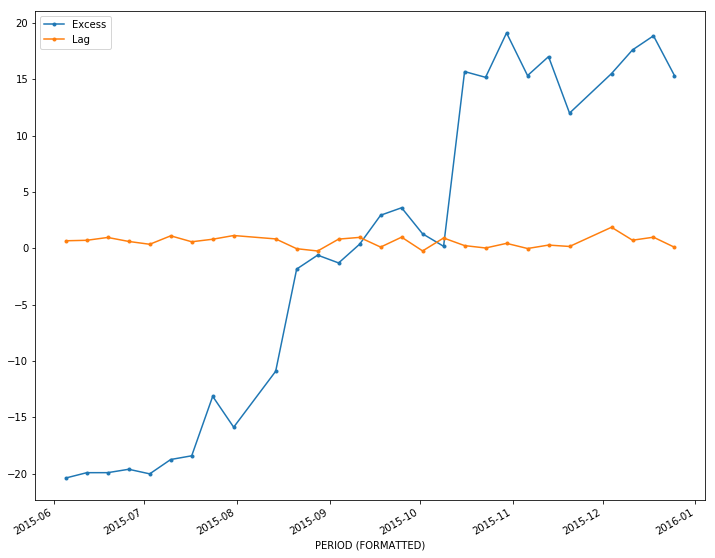

In [545]:
#Walmart USA
id='93114210'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

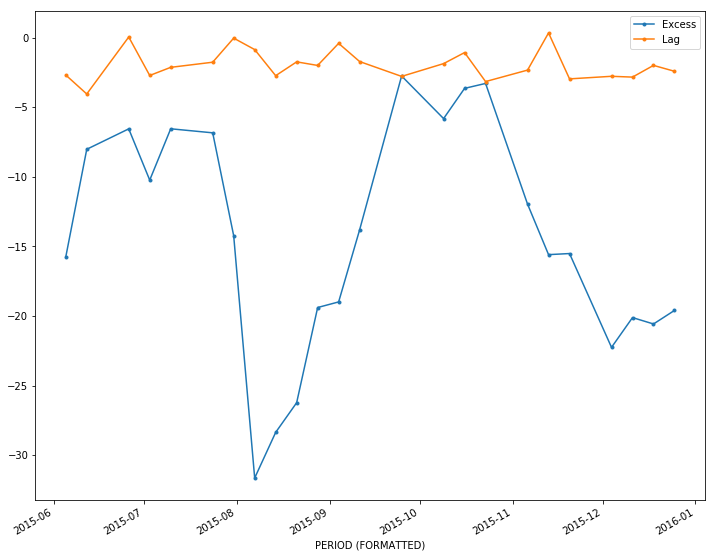

In [547]:
#Emperador Inc. china
id='BFG0SH'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

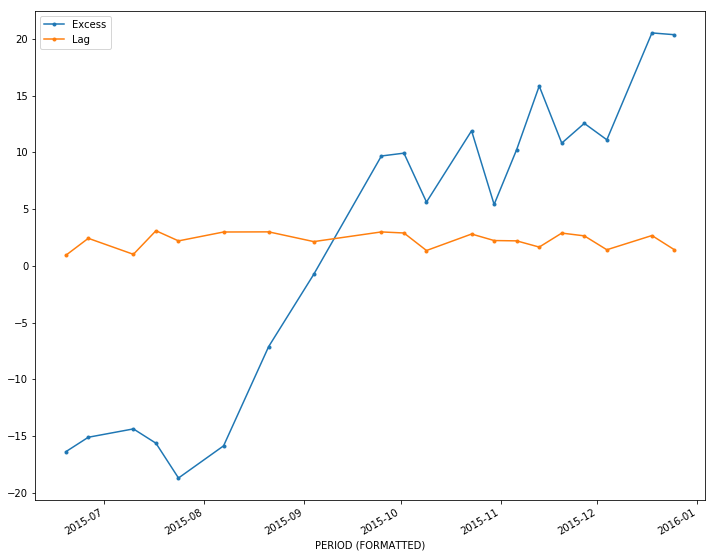

In [548]:
#Entra ASA	 USA
id='BRJ2VC'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

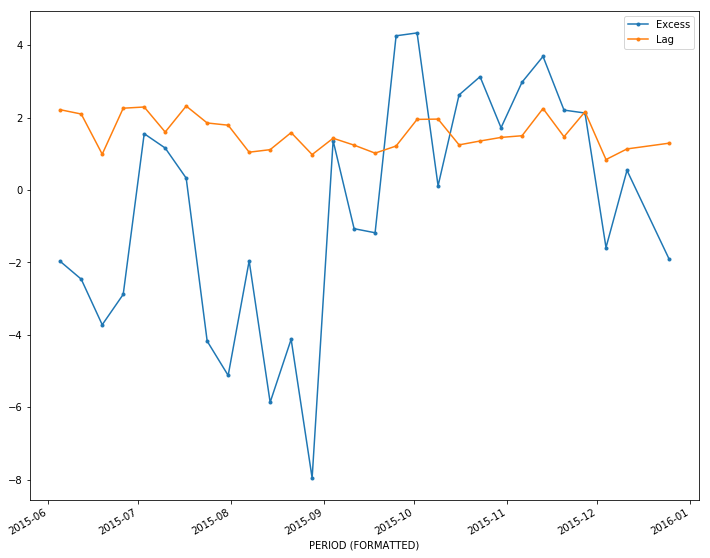

In [549]:
#Boston Properties, Inc.
id='10112110'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

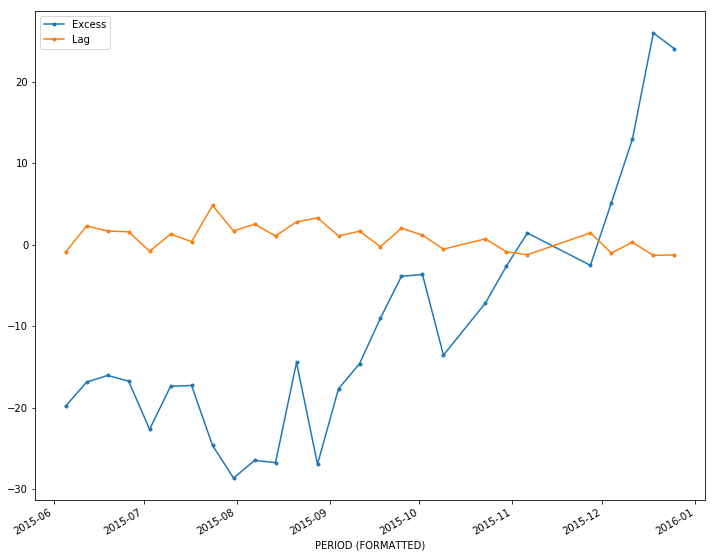

In [550]:
#Halliburton Company
id='40621610'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

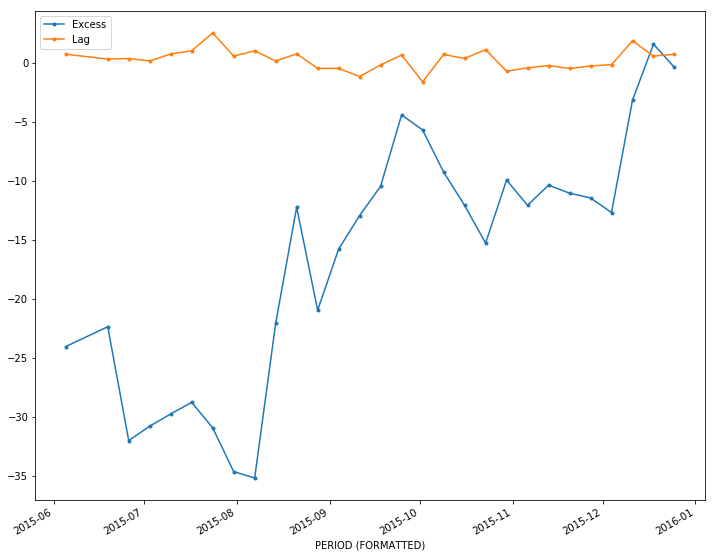

In [551]:
#Coal India Ltd.
id='B4Z9XF'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

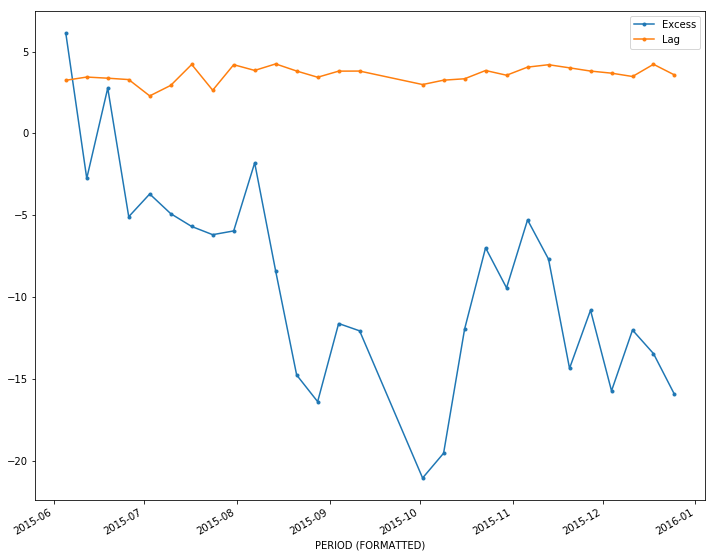

In [552]:
#Eli Lilly and Company
id='53245710'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

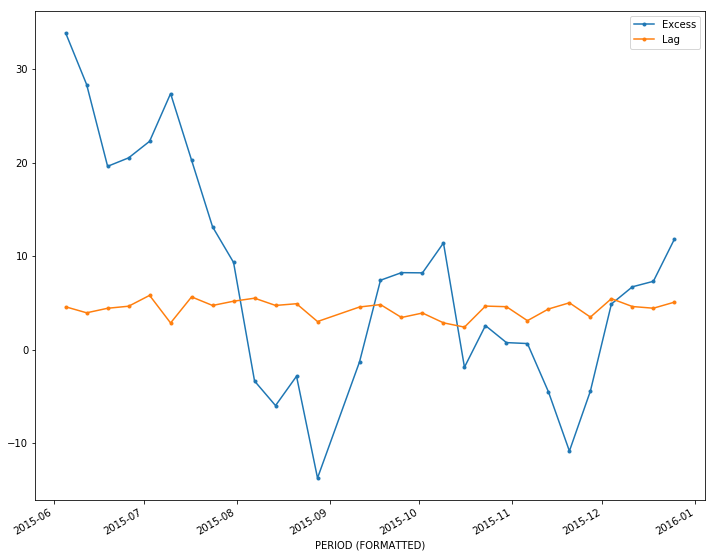

In [553]:
#Alfresa Holdings Corporation japan
id='668721'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

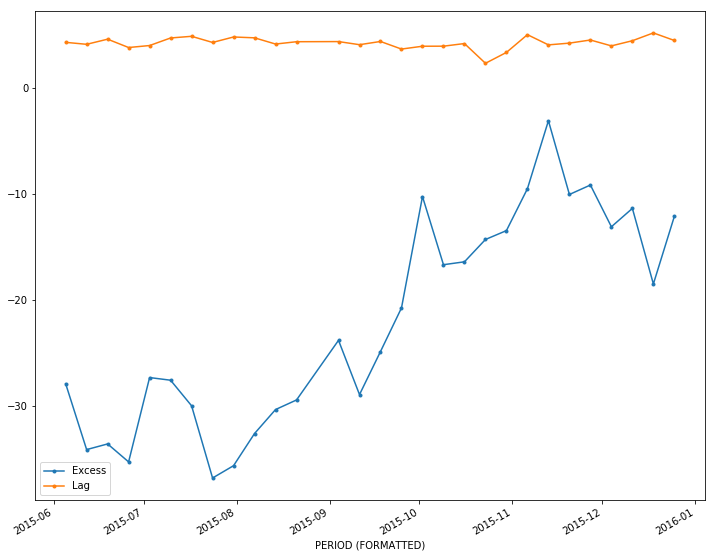

In [556]:
#ENEA S.A.	 Europe
id='B3F97B'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

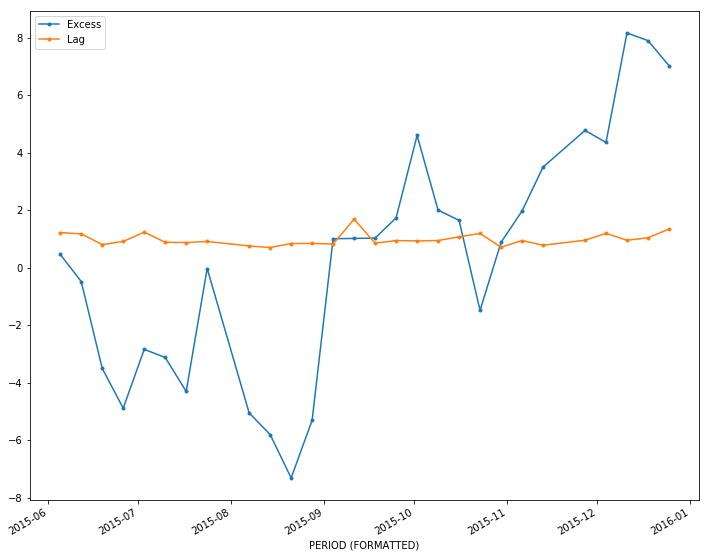

In [557]:
#Dominion Energy Inc USA
id='25746U10'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

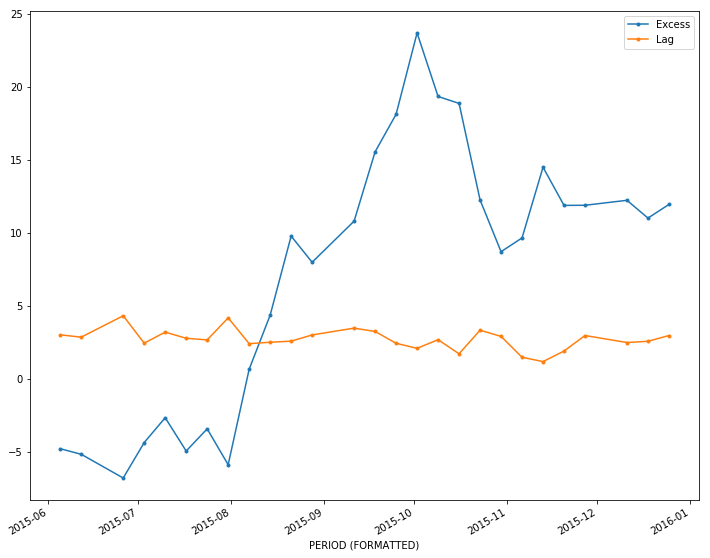

In [558]:
#Verizon
id='92343V10'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

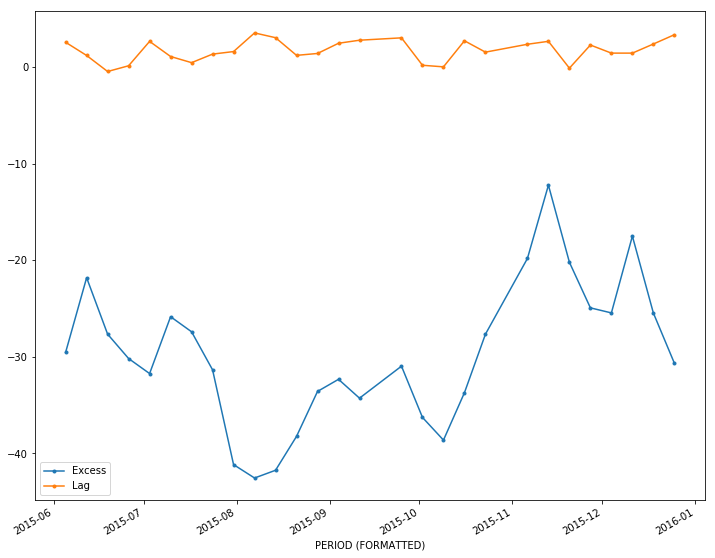

In [559]:
# Idea Cellular Limited
id='B1MP4H'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')

In [ ]:
id='668721'
temp1 = df_r_test[df_r_test.IDENTIFIER==id]
temp1[['Excess','Lag']].iloc[:100,:].plot(marker='.')